In [54]:
import numpy as np
from sklearn import preprocessing, neighbors, svm, metrics
from sklearn.model_selection import train_test_split, LeaveOneOut
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import pandas as pd
from statistics import mean 
import seaborn as sns
import matplotlib.pyplot as plt
import time

In [2]:
df = pd.read_csv('College_Sleep_Study.csv')
#remove outliers
df.replace('?', -99999, inplace = True)
#drop alcohol related features since that does not correspond to our study
df = df.drop(['AlcoholUse','Drinks'],1)
#drop the LarkOwl category since we have numeric data that represents when students rise and go to bed
df = df.drop(['LarkOwl'],1)
#drop categorical features that already have a numeric represenation
df = df.drop(['DepressionStatus', 'AnxietyStatus'],1)

In [3]:

pd.set_option('display.max_rows',None)
print(df.sort_values(['GPA']))

     Gender  ClassYear  NumEarlyClass  EarlyClass   GPA  ClassesMissed  \
66        0          2              2           1  2.00              1   
54        0          3              2           1  2.00              1   
202       1          3              0           0  2.00              2   
125       1          2              3           1  2.30              4   
33        1          2              0           0  2.35              6   
71        0          3              0           0  2.40              4   
88        0          4              3           1  2.40              0   
168       1          3              0           0  2.40              4   
223       1          2              2           1  2.40              3   
59        1          2              1           1  2.50              3   
49        1          2              2           1  2.50              0   
163       1          2              0           0  2.50              0   
166       0          2              0 

In [ ]:
cor = df.corr()
cor_target = (cor["GPA"])
cor_target = cor_target.sort_values(kind="quicksort",ascending=False)
#correlation of remaining features
print(cor_target)

In [ ]:
#drop features with less than 0.15 correlation value
abs_cor_target = abs(cor["GPA"])
abs_relevant_features = abs_cor_target[abs_cor_target>0.15]
abs_relevant_features = relevant_features.sort_values(kind="quicksort",ascending=False)
print(abs_relevant_features)

In [36]:
#only keep the features with absolute correlations > 0.15 with gpa
newdf = df[['GPA','StressScore',     
'WeekdayRise','WeekendRise']]
#removed 'Gender','ClassYear','CognitionZscore','ClassesMissed'
print(newdf)

      GPA  StressScore  WeekdayRise  WeekendRise
0    3.60            8         8.70         9.50
1    3.24            3         8.20        10.00
2    2.97            9         6.55        12.59
3    3.76            6         7.17         8.00
4    3.20           14         8.67         9.50
5    3.50           28         8.95        10.75
6    3.35            1         8.48        10.13
7    3.00            3         9.07         9.75
8    4.00           20         8.75         9.00
9    2.90           31         8.00        10.25
10   3.70           13         8.53        10.75
11   3.00           11         9.80        10.75
12   3.30           18         7.97        11.25
13   3.30            2         8.73        11.50
14   3.50            3         6.90         9.50
15   3.40           11         8.77        10.50
16   2.80           21         6.85         9.09
17   3.00           20         7.90        10.50
18   2.80            1         9.52        11.25
19   2.80           

In [48]:
#median & mean of gpa
print('median GPA: ',newdf.loc[:,'GPA'].median())
print('mean GPA: ',newdf.loc[:,'GPA'].mean())

median GPA:  3.0
mean GPA:  2.794466403162055


In [37]:
#want to show remaining features correlation but not the absolute values
cor = newdf.corr()
cor_target = (cor["GPA"])
cor_target = cor_target.sort_values(kind="quicksort",ascending=False)
#correlation of remaining features
print(cor_target)

GPA            1.000000
StressScore    0.199473
WeekendRise   -0.165884
WeekdayRise   -0.213778
Name: GPA, dtype: float64


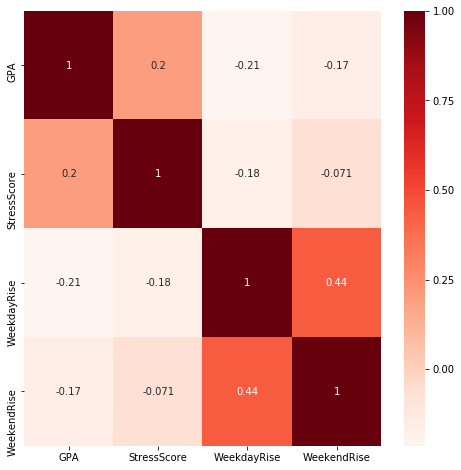

In [38]:
#heatmap of remaining features
plt.figure(figsize=(8,8))
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [39]:
#some algorithm require a categorical target feature while others accept a continuous value.
#make 2 df one with a categorical feature and one with a continuous value.
#loop through gpa to convert it to categorical
for i in range(0,253):
    if (newdf.at[i,'GPA'] >= 2.0) & (newdf.at[i,'GPA'] <3.0):
        newdf.set_value(i, "GPA", int(2))
    else:
        newdf.set_value(i, "GPA", int(3))

C:\Users\Chase\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
C:\Users\Chase\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


In [34]:
#all fields must be numerical remove non numerical features and target feature
#string type LarkOwl, AlcoholUse, DepressionStatus, AnxietyStatus, Stress
x = np.array(newdf.drop(['GPA'],1))
#df of only target feature
y = np.array(newdf['GPA'])

In [43]:
k_range = range(1,27)
iterations = 25
#contains concatentaion of each score dictionary
concatenated_lists = []
for i in range(0,iterations):
    X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
    #contains accuracy scores for each k value
    scores = []
    for k in k_range:
        knn = neighbors.KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train,y_train)
        y_pred=knn.predict(X_test)
        scores.append(metrics.accuracy_score(y_test,y_pred))
    concatenated_lists.append(scores)

#print(concatenated_lists)

[sum(x)/iterations for x in zip(*concatenated_lists)]

#need to get for each dict not sum

[0.7380392156862746,
 0.6399999999999998,
 0.778823529411765,
 0.7427450980392157,
 0.7819607843137257,
 0.75921568627451,
 0.7850980392156864,
 0.7701960784313728,
 0.7952941176470589,
 0.7843137254901963,
 0.8007843137254903,
 0.7905882352941178,
 0.7960784313725492,
 0.7905882352941178,
 0.7952941176470589,
 0.791372549019608,
 0.7976470588235297,
 0.7952941176470592,
 0.8007843137254905,
 0.7984313725490199,
 0.8047058823529415,
 0.8031372549019611,
 0.8054901960784316,
 0.8047058823529415,
 0.8039215686274512,
 0.8039215686274512]

In [62]:
''''Want to write a for loop here that will iterate through train_test_split, build models and get accuracy x times.
Save the accuracies to arrays so we can get the average accuracy for each model'''
clf1acc = []
clf2acc = []
clf3acc = []

KNN_train_time = []
KNN_test_time = []
DTC_train_time = []
DTC_test_time = []
SVC_train_time = []
SVC_test_time = []

for i in range(0,100):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2)
    
    clf1 = neighbors.KNeighborsClassifier(n_neighbors=23)
    start = time.time()
    clf1.fit(x_train, y_train)
    end = time.time()
    elapsed = end - start
    KNN_train_time.append(elapsed)
    start = time.time()
    accuracy = clf1.score(x_test, y_test)
    end = time.time()
    elapsed = end - start
    KNN_test_time.append(elapsed)
    clf1acc.append(accuracy)

    clf2 = DecisionTreeClassifier()
    start = time.time()
    clf2.fit(x_train, y_train)
    end = time.time()
    elapsed = end - start
    DTC_train_time.append(elapsed)
    start = time.time()
    accuracy = clf2.score(x_test, y_test)
    end = time.time()
    elapsed = end - start
    DTC_test_time.append(elapsed)
    clf2acc.append(accuracy)
    
    #Support Vector Classifier
    clf3 = SVC(gamma='auto')
    start = time.time()
    clf3.fit(x_train, y_train)
    end = time.time()
    elapsed = end - start
    SVC_train_time.append(elapsed)
    start = time.time()
    accuracy = clf3.score(x_test, y_test)
    end = time.time()
    elapsed = end - start
    SVC_test_time.append(elapsed)
    clf3acc.append(accuracy)
    
print('K Nearest Neighbors Test Accuracy: ', mean(clf1acc))
print('Decision Tree Test Accuracy: ', mean(clf2acc))
print('Support Vector Test Accuracy: ', mean(clf3acc))

print('Average Training Times')
print('K Nearest Neighbors Average Training Time: ', mean(KNN_train_time), 'seconds')
print('Decision Tree Classifier Average Training Time: ', mean(DTC_train_time), 'seconds')
print('Support Vector Classifier Average Training Time: ', mean(SVC_train_time), 'seconds')
print('Average Testing Times')
print('Decision Tree Classifier Average Test Time: ', mean(DTC_test_time), 'seconds')
print('Support Vector Classifier Average Test Time: ', mean(SVC_test_time), 'seconds')
print('K Nearest Neighbors Average Test Time: ', mean(KNN_test_time), 'seconds')

K Nearest Neighbors Test Accuracy:  0.7937254901960784
Decision Tree Test Accuracy:  0.6966666666666667
Support Vector Test Accuracy:  0.798235294117647
Average Training Times
K Nearest Neighbors Average Training Time:  0.0009637904167175293 seconds
Decision Tree Classifier Average Training Time:  0.001322951316833496 seconds
Support Vector Classifier Average Training Time:  0.003262026309967041 seconds
Average Testing Times
Decision Tree Classifier Average Test Time:  0.000678243637084961 seconds
Support Vector Classifier Average Test Time:  0.0011018657684326173 seconds
K Nearest Neighbors Average Test Time:  0.0060570287704467774 seconds


In [50]:
#Leave one out
clf1acc = []
clf2acc = []
clf3acc = []

loo = LeaveOneOut()
loo.get_n_splits(x)
for train_index, test_index in loo.split(x):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    #KNN
    clf1 = neighbors.KNeighborsClassifier(n_neighbors=23)
    clf1.fit(x_train, y_train)
    accuracy = clf1.score(x_test, y_test)
    clf1acc.append(accuracy)
    
    #Decision Tree
    clf2 = DecisionTreeClassifier()
    clf2.fit(x_train, y_train)
    accuracy = clf2.score(x_test, y_test)
    clf2acc.append(accuracy)
    
    #Support Vector Classifier
    clf3 = SVC(gamma='auto')
    clf3.fit(x_train, y_train)
    accuracy = clf3.score(x_test, y_test)
    clf3acc.append(accuracy)
print('K Nearest Neighbors Test Accuracy with leave one out: ', mean(clf1acc))
print('Decision Tree Test Accuracy with leave one out: ', mean(clf2acc))
print('Support Vector Test Accuracy with leave one out: ', mean(clf3acc))

K Nearest Neighbors Test Accuracy with leave one out:  0.7944664031620553
Decision Tree Test Accuracy with leave one out:  0.691699604743083
Support Vector Test Accuracy with leave one out:  0.8023715415019763
